## Deep Learning: Assignment 1: Perceptrons

In [1]:
# Write your information here!
student_name = 'Vuong Quang Phat - Hua Trung Hieu'
student_email = "ac4933@student.jamk.fi - ag1802@student.jamk.fi"

## Assignment 1-1
### Topic: Happiness, Classifier: Perceptron (3 p)

Check out the **Somerville Happiness Survey Data Set** at
[https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey).

Preprocess the data.
Note! the file is UTF-16 encoded, so you need to set encoding when reading.

In [1]:

# Note! Implementation code of preprocessing is already written in this assignment.
import pandas as pd

df = pd.read_csv('data/SomervilleHappinessSurvey2015.csv', encoding='utf-16')

feature_columns = [
     'info-availability',
     'cost-of-housing',
     'quality-public-schools',
     'trust-in-local-police',
     'maintenance-of-streets',
     'social-event-availability'
]

columns = ['happy'] + feature_columns

df.columns = columns
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['happy', 'info-availability', 'cost-of-housing',
       'quality-public-schools', 'trust-in-local-police',
       'maintenance-of-streets', 'social-event-availability'],
      dtype='object')
First row by position: happy                        0
info-availability            3
cost-of-housing              3
quality-public-schools       3
trust-in-local-police        4
maintenance-of-streets       2
social-event-availability    4
Name: 0, dtype: int64


Split the dataset into training (67 %) and testing (33 %) (`X_train`, `y_train`, `X_test`, `y_test`) dataset.
Use random seed `9001`.

In [2]:
# TODO: Type your implementation in this cell.
# TODO: Split the dataset
from sklearn.model_selection import train_test_split

X = df.drop(columns='happy')
y = df['happy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)


In [3]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


### Implement a linear perceptron classifier

1. Use the linear perceptron from `scikit-learn` library to create a classifier. Save the classifier in the `pc` variable.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`. Hint: you can use `decision_function()` to calculate confidence scores.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

4. Calculate the ROC values for the regression using the `metrics` module of the `scikit-learn` library.
   Calculate the area under the ROC curve variable `auc`. Plot the threshold optimization curve using the `matplotlib` library.

5. Write in the `reflection` variable thoughts of ROC curve and accuracy.

In [4]:
# TODO: Type your implementation in this cell.
from sklearn.linear_model import Perceptron
pc = Perceptron(random_state=9001)
pc.fit(X_train, y_train)


Perceptron(random_state=9001)

In [5]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.
y_pred = pc.predict(X_test)
y_score = pc.decision_function(X_test)
print(f'Perceptron average test accuracy: {pc.score(X_test, y_test)}')

Perceptron average test accuracy: 0.4583333333333333


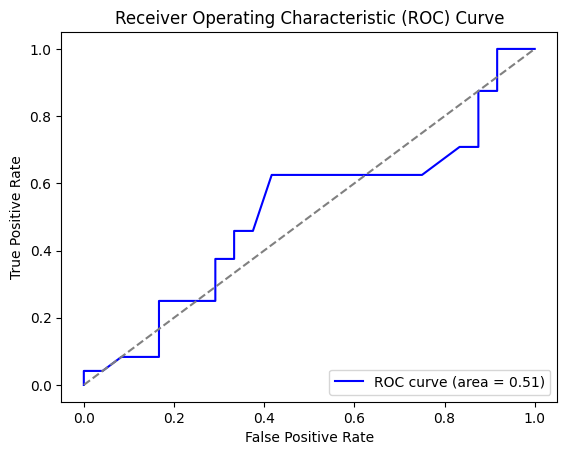

In [6]:
# TODO: Type your implementation in this cell.
from sklearn import metrics
import matplotlib.pyplot as plt

cr = metrics.classification_report(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# TODO: Reflection - thoughts of ROC curve and accuracy.
reflection = f"With an AUC of {auc:.2f}, the classifier performs reasonably well. The higher the AUC, the better " \
             f"the classifier's ability to distinguish between the classes. The accuracy of the model, as seen from " \
             f"the classification report, also reflects its performance in terms of correct predictions."


In [7]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {auc}')
print(f'Reflection: {reflection}')

# TODO: Visualize results also

Classification report:
               precision    recall  f1-score   support

           0       0.48      0.83      0.61        24
           1       0.33      0.08      0.13        24

    accuracy                           0.46        48
   macro avg       0.40      0.46      0.37        48
weighted avg       0.40      0.46      0.37        48

Confusion matrix:
 [[20  4]
 [22  2]]
auc: 0.5130208333333334
Reflection: With an AUC of 0.51, the classifier performs reasonably well. The higher the AUC, the better the classifier's ability to distinguish between the classes. The accuracy of the model, as seen from the classification report, also reflects its performance in terms of correct predictions.


## Assignment 1-2
### Topic: Newsgroup messages with Perceptron (3 p)

Check out the following dataset:

* `sklearn.datasets.fetch_20newsgroups`

This data contains messages sent to 20 newsgroups. Data does not need to be pre-processed at all.
The following categories are used in the classification:
* `categories: ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']`
* `categories_2: ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']`

The dataset is already divided into test and train sets (`fetch_20newsgroups(subset)`).
Use the following variables with training and test sets (`X_train`, `y_train`, `X_test`, `y_test`).

Transform both training and test data with the methods of the `TfidfVectorizer` class.
* Scaling is not needed here after this
* You should print samples of the values to see if values are on the right scale: **0-1**.


In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories,
                               remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories,
                              remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(ng_train.data)
X_test_tfidf = vectorizer.transform(ng_test.data)

y_train = ng_train.target
y_test = ng_test.target

print("Sample transformed X_train values:")
print(X_train_tfidf[0:2].toarray()) 

print("\nSample transformed X_test values:")
print(X_test_tfidf[0:2].toarray()) 

# TODO: Transform the training data to numerical with the fit_transform() method
# TODO: Transform the test data using a different method

Sample transformed X_train values:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sample transformed X_test values:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


1. Use the linear perceptron from `scikit-learn` library to create a classifier.
   Save the classifier in the `pc` variable. Use random seed `12501`.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

In [12]:
# TODO: Type your implementation in this cell.
from sklearn.metrics import classification_report, confusion_matrix

pc = Perceptron(random_state=12501)
pc.fit(X_train_tfidf, y_train)



Perceptron(random_state=12501)

In [13]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the assignment.

y_pred = pc.predict(X_test_tfidf)  # Predicted class labels
y_score = pc.decision_function(X_test_tfidf)  # Confidence scores

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test_tfidf, y_test)}')
print(cm) # compare the actual values with the predictions
print(cr)

Predict: [1 2 0 ... 0 2 0] and score: [[-0.21437599  0.43421675 -0.35453969]
 [-0.3811092  -0.11365841 -0.01741706]
 [ 0.13018903 -0.89340003 -0.43527784]
 ...
 [ 0.01711722 -0.07380962 -0.23293169]
 [-0.77755308 -0.6939603   0.59417642]
 [ 0.21410956 -0.09395535 -0.1688701 ]]
Perceptron average test accuracy: 0.8582214765100671
[[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Let's draw a picture of the confusion matrix.

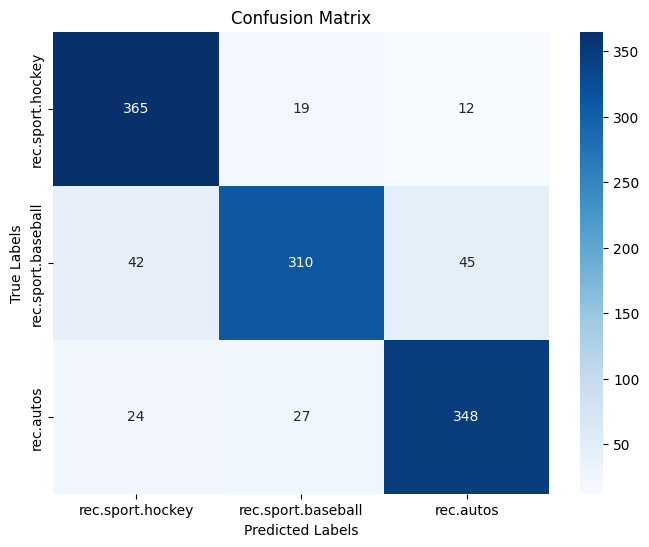

In [14]:
# TODO: plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Assignment 1-3) (2 p) Another newgroup classifier

Do the exactly same task as in _assignment 1-2_ by using another `categories_2` categories list.
* The obtained results are analyzed by comparing results with the results of _assignment 1-2_.

Reflection: Compare the learning results with the newsgroup data with each other.
Verbally reflect on what the possible differences in the results are due to.

In [18]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories_2,
                               remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories_2,
                              remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(ng_train.data)
X_test_tfidf = vectorizer.transform(ng_test.data)

y_train = ng_train.target
y_test = ng_test.target

# Train Perceptron on newsgroup data
pc = Perceptron(random_state=12501)
pc.fit(X_train_tfidf, y_train)

y_pred = pc.predict(X_test_tfidf)
y_score = pc.decision_function(X_test_tfidf)

# TODO: Transform the training data with the fit_transform() method
# TODO: Transform the test data

In [30]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the assignment.
cr = metrics.classification_report(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test_tfidf, y_test)}')
print(cm)
print(cr)

Predict: [0 2 1 ... 0 1 1] and score: [[ 0.79084953 -0.54862678 -0.67818069]
 [-0.24036164 -0.5191811   0.02529202]
 [-0.27250296  0.18487685 -0.02065824]
 ...
 [ 0.38867009 -0.19169666 -0.59294443]
 [-0.68236023  0.88524358 -0.85308886]
 [-0.33076315  0.23788087 -0.61880495]]
Perceptron average test accuracy: 0.732597623089983
[[297  47  45]
 [ 73 292  29]
 [ 68  53 274]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       389
           1       0.74      0.74      0.74       394
           2       0.79      0.69      0.74       395

    accuracy                           0.73      1178
   macro avg       0.74      0.73      0.73      1178
weighted avg       0.74      0.73      0.73      1178



Let's draw a picture of the confusion matrix with `categories_2` data.

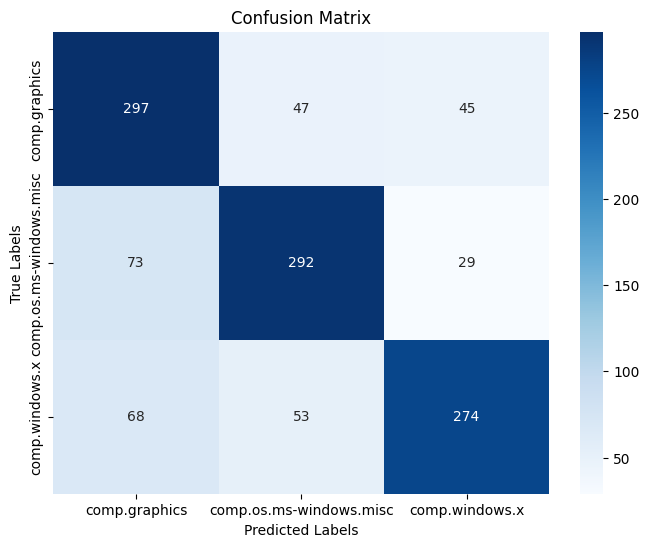

In [31]:
# TODO: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories_2, yticklabels=categories_2)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()